In [1]:
# Make sure you are using the cmpi6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/abaker/repos/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")

Start DASK...and connect to client

In [2]:
from dask.distributed import Client
from ncar_jobqueue import NCARCluster

cluster = NCARCluster(project='NTDD0004')
# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster
client = Client(cluster)

In [3]:
# list  directory contents
import os

os.listdir("/glade/work/abaker/zfp-stuff")

['092_chunk_time_6',
 '091_chunk_time_6',
 '091',
 '091_new',
 '091_onechunk',
 '092',
 '092_onechunk_zlib5',
 '092_onechunk',
 'orig',
 'orig_d5',
 'full_orig']

In [4]:
os.listdir("/glade/work/abaker/zfp-stuff")

['092_chunk_time_6',
 '091_chunk_time_6',
 '091',
 '091_new',
 '091_onechunk',
 '092',
 '092_onechunk_zlib5',
 '092_onechunk',
 'orig',
 'orig_d5',
 'full_orig']

In [5]:
col_ccn3 = ldcpy.open_datasets(
    "cam-fv",
    ["CCN3"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk_zlib5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CCN3.200601-201012.nc",
    ],
    [
        "orig",
        "091_p16",
        "092_p16",
        "091_p18",
        "092_p14",
        "091_a01",
        "092_a01",
        "091_onechk_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "091_new_p16",
        "091_chunk_t6",
        "092_chunk_t6",
    ],
    chunks={"time": 700},
)
col_ccn3

dataset size in GB 5.18



<xarray.Dataset>
Dimensions:     (collection: 13, time: 60, lev: 30, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2011-01-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U17 'orig' '091_p16' ... '092_chunk_t6'
Data variables:
    CCN3        (collection, time, lev, lat, lon) float32 dask.array<chunksize=(1, 60, 30, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon May 10 15:29:57 2021: ncks -d time,0,59,1 b.e11.BRC...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig': 272506698, '091_p16': 167881873, '092_p16': 21...

In [6]:
col_u = ldcpy.open_datasets(
    "cam-fv",
    ["U"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk_zlib5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.U.200601-201012.nc",
    ],
    [
        "orig",
        "091_p16",
        "092_p16",
        "091_p20",
        "091_a01",
        "092_a01",
        "091_new_p16",
        "091_onechk_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "091_chunk_t6",
        "092_chunk_t6",
    ],
    chunks={"time": 700},
)
# col_u

dataset size in GB 4.78



In [11]:
col_lhflx = ldcpy.open_datasets(
    "cam-fv",
    ["LHFLX"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_a_0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk_zlib5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.LHFLX.200601-201012.nc",
    ],
    [
        "orig",
        "091_p12",
        "091_p16",
        "092_p16",
        "091_p18",
        "092_p14",
        "091_a01",
        "092_a01",
        "091_onechk_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "091_new_p16",
        "091_chunk_t6",
        "092_chunk_t6",
    ],
    chunks={"time": 700},
)

col_lhflx

dataset size in GB 0.19



<xarray.Dataset>
Dimensions:     (collection: 14, time: 60, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2011-01-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U17 'orig' '091_p12' ... '092_chunk_t6'
Data variables:
    LHFLX       (collection, time, lat, lon) float32 dask.array<chunksize=(1, 60, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu May 20 11:06:14 2021: ncks -d time,0,59,1 b.e11.BRC...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig': 10456229, '091_p12': 5013908, '091_p16': 69473...

In [8]:
col_ts = ldcpy.open_datasets(
    "cam-fv",
    ["TS"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_onechunk_zlib5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
    ],
    [
        "orig",
        "091_p16",
        "092_p16",
        "092_p14",
        "091_onechk_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "091_new_p16",
        "091_chunk_t6",
        "092_chunk_t6",
    ],
    chunks={"time": 700},
)
# col_ts

dataset size in GB 0.14



In [11]:
# CCN3 (level = 10 time = 10)
ldcpy.compare_stats(
    col_ccn3.isel(time=10, lev=10),
    "CCN3",
    [
        "orig",
        "091_p16",
        "091_new_p16",
        "091_onechk_p16",
        "091_chunk_t6",
        "092_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "092_chunk_t6",
    ],
)

orig  091_p16 091_new_p16 091_onechk_p16  \
mean                            1.894    1.894       1.894          1.894   
variance                      0.28224  0.28224     0.28225        0.28225   
standard deviation            0.53126  0.53126     0.53127        0.53127   
min value                     0.68566  0.68565     0.68565        0.68565   
max value                      3.5205   3.5203      3.5203         3.5203   
probability positive                1        1           1              1   
number of zeros                     0        0           0              0   
spatial autocorr - latitude   0.99736  0.99736     0.99736        0.99736   
spatial autocorr - longitude  0.99866  0.99866     0.99866        0.99866   
entropy estimate              0.44494  0.28769     0.28802        0.28802   

                             091_chunk_t6  092_p16 092_onechk_p16  \
mean                                1.894    1.894          1.894   
variance                          0.28225  0.28223        0.28223   
standard deviation                0.53127  0.53126        0.53126   
min value                         0.68565  0.68558        0.68558   
max value                          3.5203   3.5185         3.5185   
probability positive                    1        1              1   
number of zeros                         0        0              0   
spatial autocorr - latitude       0.99736  0.99735        0.99735   
spatial autocorr - longitude      0.99866  0.99866        0.99866   
entropy estimate                  0.28802  0.38143        0.38143   

                             092_onechk_p16_z5 092_chunk_t6  
mean                                     1.894        1.894  
variance                               0.28223      0.28224  
standard deviation                     0.53126      0.53126  
min value                              0.68558      0.68565  
max value                               3.5185       3.5203  
probability positive                         1            1  
number of zeros                              0            0  
spatial autocorr - latitude            0.99735      0.99735  
spatial autocorr - longitude           0.99866      0.99866  
entropy estimate                       0.38143      0.35455

091_p16 091_new_p16 091_onechk_p16  \
max abs diff                        0.00042987  0.00059152     0.00059152   
min abs diff                                 0           0              0   
mean abs diff                       8.3759e-05  9.7194e-05     9.7194e-05   
mean squared diff                   8.1557e-14  9.2515e-10     9.2515e-10   
root mean squared diff              0.00011001  0.00012827     0.00012827   
normalized root mean squared diff   3.7746e-05  4.3958e-05     4.3958e-05   
normalized max pointwise error      0.00014323  0.00016392     0.00016392   
pearson correlation coefficient              1           1              1   
ks p-value                             0.41797     0.41367        0.41367   
spatial relative error(% > 0.0001)       6.854      11.328         11.328   
max spatial relative error          0.00020064  0.00022489     0.00022489   
data SSIM                              0.99866     0.99857        0.99857   
file size ratio                           1.62        1.62           1.62   

                                   091_chunk_t6     092_p16 092_onechk_p16  \
max abs diff                         0.00059152    0.011097       0.011097   
min abs diff                                  0           0              0   
mean abs diff                        9.7194e-05  0.00085567     0.00085567   
mean squared diff                    9.2515e-10  2.8022e-13     2.8022e-13   
root mean squared diff               0.00012827   0.0011889      0.0011889   
normalized root mean squared diff    4.3958e-05  0.00037797     0.00037797   
normalized max pointwise error       0.00016392     0.00356        0.00356   
pearson correlation coefficient               1           1              1   
ks p-value                              0.41367     0.96188        0.96188   
spatial relative error(% > 0.0001)       11.328      82.728         82.728   
max spatial relative error           0.00022489   0.0040884      0.0040884   
data SSIM                               0.99857      0.9902         0.9902   
file size ratio                            1.62        1.26           1.23   

                                   092_onechk_p16_z5 092_chunk_t6  
max abs diff                                0.011097    0.0052464  
min abs diff                                       0            0  
mean abs diff                             0.00085567   0.00055787  
mean squared diff                         2.8022e-13   6.4475e-12  
root mean squared diff                     0.0011889   0.00074424  
normalized root mean squared diff         0.00037797   0.00024202  
normalized max pointwise error               0.00356    0.0018507  
pearson correlation coefficient                    1            1  
ks p-value                                   0.96188      0.97267  
spatial relative error(% > 0.0001)            82.728       75.485  
max spatial relative error                 0.0040884    0.0023262  
data SSIM                                     0.9902      0.99297  
file size ratio                                 1.25         1.29

In [9]:
# 3D so just do lev 10 (or any level)or it is really slow
ldcpy.compare_stats(
    col_ccn3.isel(time=10, lev=10), "CCN3", ["orig", "091_p18", "092_p14", "091_a01", "092_a01"]
)

orig  091_p18  092_p14  091_a01  092_a01
mean                            1.894    1.894    1.894    1.894    1.894
variance                      0.28224  0.28224  0.28224  0.28216  0.28224
standard deviation            0.53126  0.53126  0.53127  0.53119  0.53126
min value                     0.68566  0.68567  0.68488  0.68311  0.68564
max value                      3.5205   3.5205   3.5231   3.5166   3.5203
probability positive                1        1        1        1        1
number of zeros                     0        0        0        0        0
spatial autocorr - latitude   0.99736  0.99736  0.99731  0.99735  0.99736
spatial autocorr - longitude  0.99866  0.99866  0.99862  0.99866  0.99866
entropy estimate              0.44494  0.33365  0.33345  0.15423  0.43641

091_p18     092_p14     091_a01  \
max abs diff                          0.000108    0.047009   0.0042226   
min abs diff                                 0           0           0   
mean abs diff                        2.099e-05   0.0029948  0.00098864   
mean squared diff                    1.118e-17  1.1889e-10  3.1581e-10   
root mean squared diff              2.7542e-05   0.0042481   0.0012308   
normalized root mean squared diff   9.5495e-06    0.001325  0.00041388   
normalized max pointwise error      3.6754e-05    0.014636   0.0014674   
pearson correlation coefficient              1     0.99998           1   
ks p-value                             0.42664     0.97267     0.11344   
spatial relative error(% > 0.0001)           0      94.741      88.146   
max spatial relative error          5.0876e-05    0.019064    0.004286   
data SSIM                              0.99971     0.96839     0.98638   
file size ratio                           1.48        1.44        2.26   

                                       092_a01  
max abs diff                        0.00061691  
min abs diff                                 0  
mean abs diff                       0.00010726  
mean squared diff                   2.6673e-13  
root mean squared diff              0.00013432  
normalized root mean squared diff   4.6621e-05  
normalized max pointwise error      0.00019567  
pearson correlation coefficient              1  
ks p-value                             0.98243  
spatial relative error(% > 0.0001)       20.69  
max spatial relative error          0.00060785  
data SSIM                              0.99845  
file size ratio                           1.09

In [15]:
ldcpy.compare_stats(
    col_lhflx.isel(time=10),
    "LHFLX",
    [
        "orig",
        "091_p16",
        "091_new_p16",
        "091_onechk_p16",
        "091_chunk_t6",
        "092_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "092_chunk_t6",
    ],
)

orig  091_p16 091_new_p16 091_onechk_p16  \
mean                            86.72    86.72      86.721         86.721   
variance                       4010.6   4010.6      4010.8         4010.8   
standard deviation              63.33    63.33      63.331         63.331   
min value                     -3.8508  -3.8535     -3.8457        -3.8457   
max value                      447.16   447.21      447.21         447.21   
probability positive          0.82709  0.82709     0.82709        0.82709   
number of zeros                     0        0           0              0   
spatial autocorr - latitude    0.9784   0.9784      0.9784         0.9784   
spatial autocorr - longitude   0.9813   0.9813      0.9813         0.9813   
entropy estimate              0.51122  0.36734     0.36761        0.36761   

                             091_chunk_t6  092_p16 092_onechk_p16  \
mean                               86.721   86.721         86.721   
variance                           4010.8   4010.6         4010.6   
standard deviation                 63.331    63.33          63.33   
min value                         -3.8457  -3.8384        -3.8384   
max value                          447.21   447.15         447.15   
probability positive              0.82709  0.82706        0.82706   
number of zeros                         0        0              0   
spatial autocorr - latitude        0.9784   0.9784         0.9784   
spatial autocorr - longitude       0.9813   0.9813         0.9813   
entropy estimate                  0.36761  0.42126        0.42126   

                             092_onechk_p16_z5 092_chunk_t6  
mean                                    86.721        86.72  
variance                                4010.6       4010.6  
standard deviation                       63.33        63.33  
min value                              -3.8384      -3.8701  
max value                               447.15       447.11  
probability positive                   0.82706      0.82713  
number of zeros                              0            0  
spatial autocorr - latitude             0.9784       0.9784  
spatial autocorr - longitude            0.9813       0.9813  
entropy estimate                       0.42126      0.39841

091_p16 091_new_p16 091_onechk_p16  \
max abs diff                           0.05011     0.06723        0.06723   
min abs diff                                 0           0              0   
mean abs diff                          0.00395   0.0045524      0.0045524   
mean squared diff                   5.3092e-11  2.0016e-06     2.0016e-06   
root mean squared diff               0.0059725   0.0069212      0.0069212   
normalized root mean squared diff   1.1229e-05  1.3018e-05     1.3018e-05   
normalized max pointwise error      8.6678e-05  0.00010004     0.00010004   
pearson correlation coefficient              1           1              1   
ks p-value                                   1           1              1   
spatial relative error(% > 0.0001)      11.661      16.354         16.354   
max spatial relative error             0.12467     0.12467        0.12467   
data SSIM                              0.99992     0.99992        0.99992   
file size ratio                           1.51         1.5            1.5   

                                   091_chunk_t6     092_p16 092_onechk_p16  \
max abs diff                            0.06723     0.21808        0.21808   
min abs diff                                  0           0              0   
mean abs diff                         0.0045524    0.020434       0.020434   
mean squared diff                    2.0016e-06  3.8838e-07     3.8838e-07   
root mean squared diff                0.0069212     0.02941        0.02941   
normalized root mean squared diff    1.3018e-05   5.567e-05      5.567e-05   
normalized max pointwise error       0.00010004  0.00048353     0.00048353   
pearson correlation coefficient               1           1              1   
ks p-value                                    1           1              1   
spatial relative error(% > 0.0001)       16.354      78.554         78.554   
max spatial relative error              0.12467      11.757         11.757   
data SSIM                               0.99992      0.9993         0.9993   
file size ratio                             1.5         1.3           1.29   

                                   092_onechk_p16_z5 092_chunk_t6  
max abs diff                                 0.21808      0.16087  
min abs diff                                       0            0  
mean abs diff                               0.020434     0.013233  
mean squared diff                         3.8838e-07   1.6046e-11  
root mean squared diff                       0.02941     0.020017  
normalized root mean squared diff          5.567e-05   3.7785e-05  
normalized max pointwise error            0.00048353   0.00035273  
pearson correlation coefficient                    1            1  
ks p-value                                         1            1  
spatial relative error(% > 0.0001)            78.554       62.943  
max spatial relative error                    11.757       3.8765  
data SSIM                                     0.9993      0.99972  
file size ratio                                  1.3         1.32

In [10]:
ldcpy.compare_stats(col_lhflx.isel(time=10), "LHFLX", ["orig", "091_a01", "092_a01"])

orig  091_a01  092_a01
mean                            86.72    86.72    86.72
variance                       4010.6   4010.6   4010.6
standard deviation              63.33    63.33    63.33
min value                     -3.8508  -3.8511  -3.8508
max value                      447.16   447.17   447.16
probability positive          0.82709  0.82708  0.82709
number of zeros                     0        2        0
spatial autocorr - latitude    0.9784   0.9784   0.9784
spatial autocorr - longitude   0.9813   0.9813   0.9813
entropy estimate              0.51122  0.36682  0.48711

091_a01     092_a01
max abs diff                         0.0047333   0.0011711
min abs diff                                 0           0
mean abs diff                        0.0010727  0.00022377
mean squared diff                   6.0672e-11  2.7788e-15
root mean squared diff               0.0013274  0.00027999
normalized root mean squared diff   2.9335e-06  6.2147e-07
normalized max pointwise error       9.676e-06  2.5966e-06
pearson correlation coefficient              1           1
ks p-value                                   1           1
spatial relative error(% > 0.0001)      30.284       19.58
max spatial relative error              5.3147     0.99677
data SSIM                              0.99988     0.99992
file size ratio                           1.49        1.06

In [12]:
ldcpy.compare_stats(
    col_lhflx.isel(time=10),
    "LHFLX",
    ["orig", "091_p12", "091_p16", "091_p18", "092_p14", "092_p16"],
)

orig  091_p12  091_p16  091_p18  092_p14  \
mean                            86.72    86.72    86.72    86.72   86.722   
variance                       4010.6   4010.7   4010.6   4010.6   4010.8   
standard deviation              63.33    63.33    63.33    63.33   63.331   
min value                     -3.8508  -3.7812  -3.8535  -3.8506    -3.75   
max value                      447.16   447.62   447.21   447.16   447.47   
probability positive          0.82709  0.82708  0.82709  0.82709  0.82702   
number of zeros                     0        1        0        0        0   
spatial autocorr - latitude    0.9784   0.9784   0.9784   0.9784   0.9784   
spatial autocorr - longitude   0.9813   0.9813   0.9813   0.9813   0.9813   
entropy estimate              0.51122  0.28434  0.36734    0.405  0.38416   

                              092_p16  
mean                           86.721  
variance                       4010.6  
standard deviation              63.33  
min value                     -3.8384  
max value                      447.15  
probability positive          0.82706  
number of zeros                     0  
spatial autocorr - latitude    0.9784  
spatial autocorr - longitude   0.9813  
entropy estimate              0.42126

091_p12     091_p16     091_p18  \
max abs diff                           0.75333     0.05011    0.013245   
min abs diff                        1.4901e-07           0           0   
mean abs diff                         0.062647     0.00395   0.0009836   
mean squared diff                   7.6324e-08  5.3092e-11  1.1373e-11   
root mean squared diff                0.095252   0.0059725   0.0014945   
normalized root mean squared diff   0.00017916  1.1229e-05  2.8136e-06   
normalized max pointwise error       0.0016703  8.6678e-05  2.9366e-05   
pearson correlation coefficient              1           1           1   
ks p-value                                   1           1           1   
spatial relative error(% > 0.0001)      91.395      11.661      1.2171   
max spatial relative error              1.6291     0.12467    0.035152   
data SSIM                               0.9988     0.99992     0.99996   
file size ratio                           2.09        1.51        1.37   

                                       092_p14     092_p16  
max abs diff                           0.91273     0.21808  
min abs diff                                 0           0  
mean abs diff                         0.081825    0.020434  
mean squared diff                   4.5352e-06  3.8838e-07  
root mean squared diff                 0.11788     0.02941  
normalized root mean squared diff   0.00022304   5.567e-05  
normalized max pointwise error       0.0020237  0.00048353  
pearson correlation coefficient              1           1  
ks p-value                                   1           1  
spatial relative error(% > 0.0001)      94.434      78.554  
max spatial relative error              26.995      11.757  
data SSIM                              0.99744      0.9993  
file size ratio                           1.42         1.3

In [16]:
ldcpy.compare_stats(
    col_ts.isel(time=10),
    "TS",
    [
        "orig",
        "091_p16",
        "091_new_p16",
        "091_onechk_p16",
        "091_chunk_t6",
        "092_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "092_chunk_t6",
    ],
)

orig  091_p16 091_new_p16 091_onechk_p16  \
mean                           286.58   286.58      286.58         286.58   
variance                       501.42   501.42      501.46         501.46   
standard deviation             22.392   22.392      22.393         22.393   
min value                      224.47   224.46      224.47         224.47   
max value                      310.34   310.33      310.33         310.33   
probability positive                1        1           1              1   
number of zeros                     0        0           0              0   
spatial autocorr - latitude   0.99554  0.99554     0.99554        0.99554   
spatial autocorr - longitude  0.99824  0.99824     0.99824        0.99824   
entropy estimate               0.4065  0.22836     0.22923        0.22923   

                             091_chunk_t6  092_p16 092_onechk_p16  \
mean                               286.58   286.58         286.58   
variance                           501.46   501.43         501.43   
standard deviation                 22.393   22.393         22.393   
min value                          224.47   224.44         224.44   
max value                          310.33   310.38         310.38   
probability positive                    1        1              1   
number of zeros                         0        0              0   
spatial autocorr - latitude       0.99554  0.99554        0.99554   
spatial autocorr - longitude      0.99824  0.99823        0.99823   
entropy estimate                  0.22923  0.30544        0.30544   

                             092_onechk_p16_z5 092_chunk_t6  
mean                                    286.58       286.58  
variance                                501.43       501.42  
standard deviation                      22.393       22.392  
min value                               224.44        224.5  
max value                               310.38        310.3  
probability positive                         1            1  
number of zeros                              0            0  
spatial autocorr - latitude            0.99554      0.99554  
spatial autocorr - longitude           0.99823      0.99823  
entropy estimate                       0.30544      0.27656

091_p16 091_new_p16 091_onechk_p16  \
max abs diff                          0.054474    0.072449       0.072449   
min abs diff                                 0           0              0   
mean abs diff                         0.013445    0.015526       0.015526   
mean squared diff                   4.8251e-09  2.4937e-05     2.4937e-05   
root mean squared diff                0.016758    0.019402       0.019402   
normalized root mean squared diff   0.00018335   0.0002122      0.0002122   
normalized max pointwise error      0.00063438  0.00070403     0.00070403   
pearson correlation coefficient              1           1              1   
ks p-value                                   1           1              1   
spatial relative error(% > 0.0001)      7.8487      12.467         12.467   
max spatial relative error          0.00019796  0.00022035     0.00022035   
data SSIM                              0.99506      0.9941         0.9941   
file size ratio                           2.14        2.12           2.12   

                                   091_chunk_t6     092_p16 092_onechk_p16  \
max abs diff                           0.072449     0.34601        0.34601   
min abs diff                                  0           0              0   
mean abs diff                          0.015526    0.044323       0.044323   
mean squared diff                    2.4937e-05  6.0176e-07     6.0176e-07   
root mean squared diff                 0.019402     0.05756        0.05756   
normalized root mean squared diff     0.0002122  0.00067095     0.00067095   
normalized max pointwise error       0.00070403   0.0034135      0.0034135   
pearson correlation coefficient               1           1              1   
ks p-value                                    1           1              1   
spatial relative error(% > 0.0001)       12.467       59.27          59.27   
max spatial relative error           0.00022035   0.0012131      0.0012131   
data SSIM                                0.9941       0.985          0.985   
file size ratio                             2.1         1.6           1.61   

                                   092_onechk_p16_z5 092_chunk_t6  
max abs diff                                 0.34601      0.25696  
min abs diff                                       0            0  
mean abs diff                               0.044323     0.033382  
mean squared diff                         6.0176e-07   6.8246e-08  
root mean squared diff                       0.05756     0.043071  
normalized root mean squared diff         0.00067095   0.00048519  
normalized max pointwise error             0.0034135    0.0029924  
pearson correlation coefficient                    1            1  
ks p-value                                         1            1  
spatial relative error(% > 0.0001)             59.27       46.607  
max spatial relative error                 0.0012131    0.0009247  
data SSIM                                      0.985      0.98898  
file size ratio                                  1.6         1.65

In [17]:
# 3D so just do lev 0
ldcpy.compare_stats(
    col_u.isel(time=10, lev=0),
    "U",
    [
        "orig",
        "091_p16",
        "091_new_p16",
        "091_onechk_p16",
        "091_chunk_t6",
        "092_p16",
        "092_onechk_p16",
        "092_onechk_p16_z5",
        "092_chunk_t6",
        "091_a01",
        "092_a01",
    ],
)

orig  091_p16 091_new_p16 091_onechk_p16  \
mean                           4.2841   4.2841      4.2844         4.2844   
variance                        831.7    831.7      831.71         831.71   
standard deviation             28.839   28.839      28.839         28.839   
min value                     -45.351  -45.352     -45.352        -45.352   
max value                      77.816   77.816      77.812         77.812   
probability positive          0.59932  0.59932     0.59932        0.59932   
number of zeros                     0        0           0              0   
spatial autocorr - latitude   0.99723  0.99723     0.99723        0.99723   
spatial autocorr - longitude  0.99994  0.99994     0.99994        0.99994   
entropy estimate              0.48705   0.3212     0.32214        0.32214   

                             091_chunk_t6  092_p16 092_onechk_p16  \
mean                               4.2844   4.2844         4.2844   
variance                           831.71   831.71         831.71   
standard deviation                 28.839   28.839         28.839   
min value                         -45.352  -45.375        -45.375   
max value                          77.812   77.839         77.839   
probability positive              0.59932  0.59937        0.59937   
number of zeros                         0        1              1   
spatial autocorr - latitude       0.99723  0.99723        0.99723   
spatial autocorr - longitude      0.99994  0.99994        0.99994   
entropy estimate                  0.32214   0.3818         0.3818   

                             092_onechk_p16_z5 092_chunk_t6  091_a01  092_a01  
mean                                    4.2844       4.2842   4.2841   4.2841  
variance                                831.71       831.71    831.7    831.7  
standard deviation                      28.839       28.839   28.839   28.839  
min value                              -45.375      -45.375  -45.352  -45.351  
max value                               77.839       77.813   77.814   77.816  
probability positive                   0.59937       0.5993  0.59932  0.59932  
number of zeros                              1            0        0        0  
spatial autocorr - latitude            0.99723      0.99723  0.99723  0.99723  
spatial autocorr - longitude           0.99994      0.99994  0.99994  0.99994  
entropy estimate                        0.3818      0.36361  0.31693  0.48557

091_p16 091_new_p16 091_onechk_p16  \
max abs diff                          0.012192    0.013252       0.013252   
min abs diff                                 0           0              0   
mean abs diff                       0.00086918    0.001006       0.001006   
mean squared diff                    1.977e-12  1.0495e-07     1.0495e-07   
root mean squared diff               0.0012945   0.0014903      0.0014903   
normalized root mean squared diff   1.2116e-05  1.3927e-05     1.3927e-05   
normalized max pointwise error      9.5269e-05   0.0001076      0.0001076   
pearson correlation coefficient              1           1              1   
ks p-value                                   1           1              1   
spatial relative error(% > 0.0001)      5.3241      8.9084         8.9084   
max spatial relative error              0.2039    0.030666       0.030666   
data SSIM                              0.99977     0.99978        0.99978   
file size ratio                           1.59        1.58           1.58   

                                   091_chunk_t6     092_p16 092_onechk_p16  \
max abs diff                           0.013252     0.14727        0.14727   
min abs diff                                  0           0              0   
mean abs diff                          0.001006    0.010915       0.010915   
mean squared diff                    1.0495e-07  9.7139e-08     9.7139e-08   
root mean squared diff                0.0014903     0.01496        0.01496   
normalized root mean squared diff    1.3927e-05  0.00013219     0.00013219   
normalized max pointwise error        0.0001076   0.0009792      0.0009792   
pearson correlation coefficient               1           1              1   
ks p-value                                    1           1              1   
spatial relative error(% > 0.0001)       8.9084      85.382         85.382   
max spatial relative error             0.030666      95.259         95.259   
data SSIM                               0.99978     0.99709        0.99709   
file size ratio                            1.58        1.29           1.28   

                                   092_onechk_p16_z5 092_chunk_t6     091_a01  \
max abs diff                                 0.14727     0.083664   0.0045071   
min abs diff                                       0            0           0   
mean abs diff                               0.010915    0.0064879   0.0010106   
mean squared diff                         9.7139e-08   1.2931e-08  3.3745e-09   
root mean squared diff                       0.01496     0.009291   0.0012517   
normalized root mean squared diff         0.00013219   8.0727e-05  1.0043e-05   
normalized max pointwise error             0.0009792   0.00067927  3.5912e-05   
pearson correlation coefficient                    1            1           1   
ks p-value                                         1            1           1   
spatial relative error(% > 0.0001)            85.382       76.414      20.459   
max spatial relative error                    95.259       22.654     0.56772   
data SSIM                                    0.99709      0.99841     0.99979   
file size ratio                                 1.28         1.32        1.77   

                                       092_a01  
max abs diff                        0.00063562  
min abs diff                                 0  
mean abs diff                       0.00011367  
mean squared diff                    6.865e-15  
root mean squared diff              0.00014293  
normalized root mean squared diff   1.1456e-06  
normalized max pointwise error      4.6148e-06  
pearson correlation coefficient              1  
ks p-value                                   1  
spatial relative error(% > 0.0001)      1.8338  
max spatial relative error             0.94029  
data SSIM                              0.99999  
file size ratio                           1.02

In [ ]:
lhflx_o = col_lhflx["LHFLX"].isel(time=0).sel(collection='orig').data.compute()
print(lhflx_o.shape)
print(lhflx_o.flags)
print(lhflx_o.strides)

In [19]:
# so confirm this is stored row-wise.....
1152 / 4

288.0

In [20]:
col_ts

<xarray.Dataset>
Dimensions:     (collection: 8, time: 60, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2011-01-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U17 'orig' '091_p16' ... '091_new_p16'
Data variables:
    TS          (collection, time, lat, lon) float32 dask.array<chunksize=(1, 60, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Mon May 10 15:27:00 2021: ncks -d time,0,59,1 b.e11.BRC...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig': 7697245, '091_p16': 3603384, '092_p16': 479792...

In [22]:
ts_091_p12 = col_ts["TS"].isel(time=0).sel(collection='091_p16').data.compute()
print(ts_091_p12.shape)
print(ts_091_p12.flags)
print(ts_091_p12.strides)
print(ts_091_p12.ndim)

(192, 288)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : False
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(1152, 4)
2


In [23]:
ts_orig = col_ts["TS"].sel(collection='orig').data.compute()
print(f"type(ts_orig): {type(ts_orig)}")
print(f"ts_orig.dtype: {ts_orig.dtype}")
print(f"number of elements: {ts_orig.size}")
print((f"ts_orig.nbytes: {ts_orig.nbytes}B or %.2fMB") % (ts_orig.nbytes / 1024 / 1024))
print(f"ts_orig.shape: {ts_orig.shape}")
print(f"ts_orig.strides: {ts_orig.strides}")
# print(ts_orig.flags)

type(ts_orig): <class 'numpy.ndarray'>
ts_orig.dtype: float32
number of elements: 3317760
ts_orig.nbytes: 13271040B or 12.66MB
ts_orig.shape: (60, 192, 288)
ts_orig.strides: (221184, 1152, 4)


In [24]:
# lossless
import gzip

ts_ll = gzip.compress(ts_orig)
print(f"type(ts_ll): {type(ts_ll)}")
print((f"number of bytes: {len(ts_ll)} (%.2fMB)") % (len(ts_ll) / 1024 / 1024))
print("compression ratio(orig): %0.2f\n" % (ts_orig.nbytes / len(ts_ll)))

type(ts_ll): <class 'bytes'>
number of bytes: 10060900 (9.59MB)
compression ratio(orig): 1.32



In [25]:
# lossy
import zfpy

ts_compressed = zfpy.compress_numpy(ts_orig, precision=16)
print(f"type(ts_compressed): {type(ts_compressed)}")
print((f"number of bytes: {len(ts_compressed)} (%.2fMB)") % (len(ts_compressed) / 1024 / 1024))

print("compression ratio (vs. orig): %0.2f" % (ts_orig.nbytes / len(ts_compressed)))
print("compression ratio(vs. lossless) : %0.2f\n" % (len(ts_ll) / len(ts_compressed)))


# get reconstructed version
ts_decompressed = zfpy.decompress_numpy(ts_compressed)
print(f"type(ts_decompressed): {type(ts_decompressed)}")
print(
    (f"ts_decompressed.nbytes: {ts_decompressed.nbytes}B or %.2fMB")
    % (ts_decompressed.nbytes / 1024 / 1024)
)
print(f"min difference: {(ts_decompressed- ts_orig).min()}")
print(f"max difference: {(ts_decompressed- ts_orig).max()}")

type(ts_compressed): <class 'bytes'>
number of bytes: 1553024 (1.48MB)
compression ratio (vs. orig): 8.55
compression ratio(vs. lossless) : 6.48

type(ts_decompressed): <class 'numpy.ndarray'>
ts_decompressed.nbytes: 13271040B or 12.66MB
min difference: -0.37322998046875
max difference: 0.53662109375


In [26]:
# compare data arrays
import xarray as xr

TS_orig = col_ts["TS"].sel(collection='orig')
TS_zfp = TS_orig.copy()
TS_zfp.data = ts_decompressed

TS_orig_ds = TS_orig.to_dataset()
TS_zfp_ds = TS_zfp.to_dataset()

# new_col_ts = ldcpy.collect_datasets("cam-fv", ["TS"], [TS_orig_ds, TS_zfp_ds], ["orig", "zfp"])
# not working as we don't have the weights

In [28]:
import numpy as np

ts_091_p16 = col_ts["TS"].sel(collection='091_p16').data.compute()
ts_092_p16 = col_ts["TS"].sel(collection='092_p16').data.compute()
diff_092_p16 = ts_092_p16 - ts_decompressed
diff_091_p16 = ts_091_p16 - ts_decompressed
print("091 diff =>", np.linalg.norm(diff_091_p16))
print("092 diff =>", np.linalg.norm(diff_092_p16))

ts_orig_t10 = col_ts["TS"].sel(collection='orig').isel(time=10).data.compute()
ts_091_p16_t10 = col_ts["TS"].sel(collection='091_p16').isel(time=10).data.compute()
ts_092_p16_t10 = col_ts["TS"].sel(collection='092_p16').isel(time=10).data.compute()


print(f"092: max difference: {(abs(ts_092_p16_t10- ts_orig_t10)).max()}")
print(f"091: max difference: {(abs(ts_091_p16_t10- ts_orig_t10)).max()}")

091 diff => 125.55371
092 diff => 0.0
092: max difference: 0.34600830078125
091: max difference: 0.054473876953125


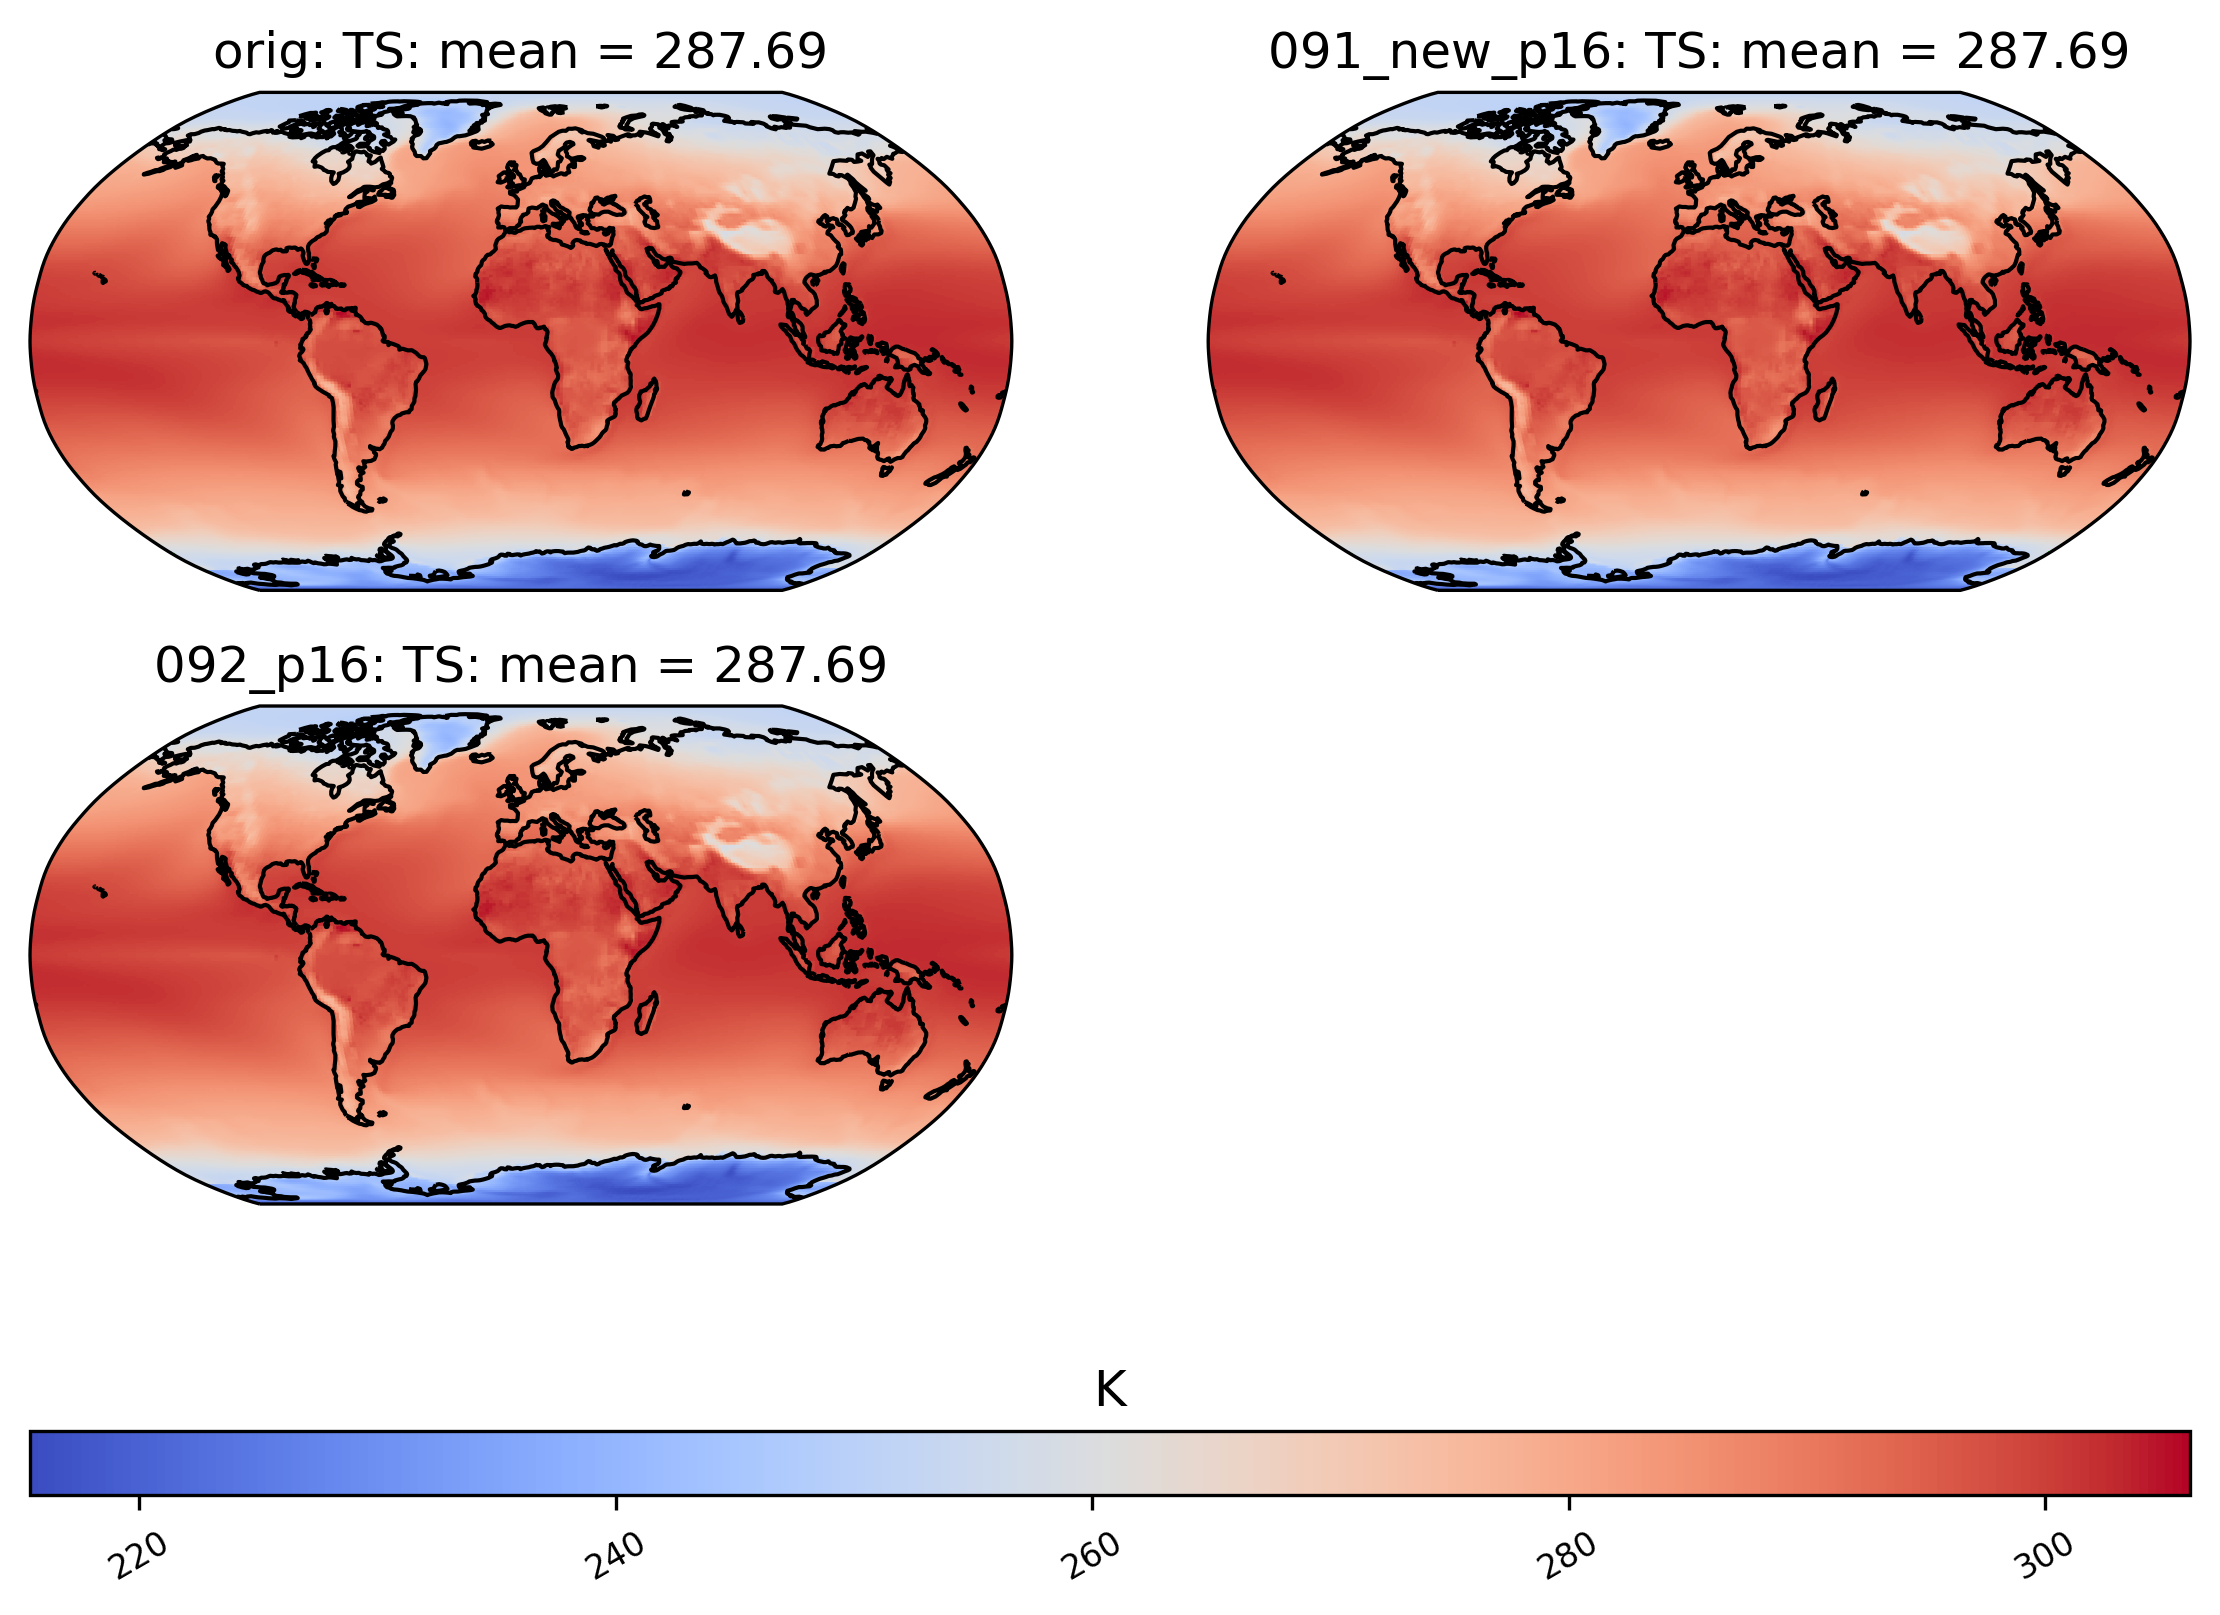

In [29]:
# look at mean values
ldcpy.plot(col_ts, "TS", sets=["orig", "091_new_p16", "092_p16"], calc="mean")

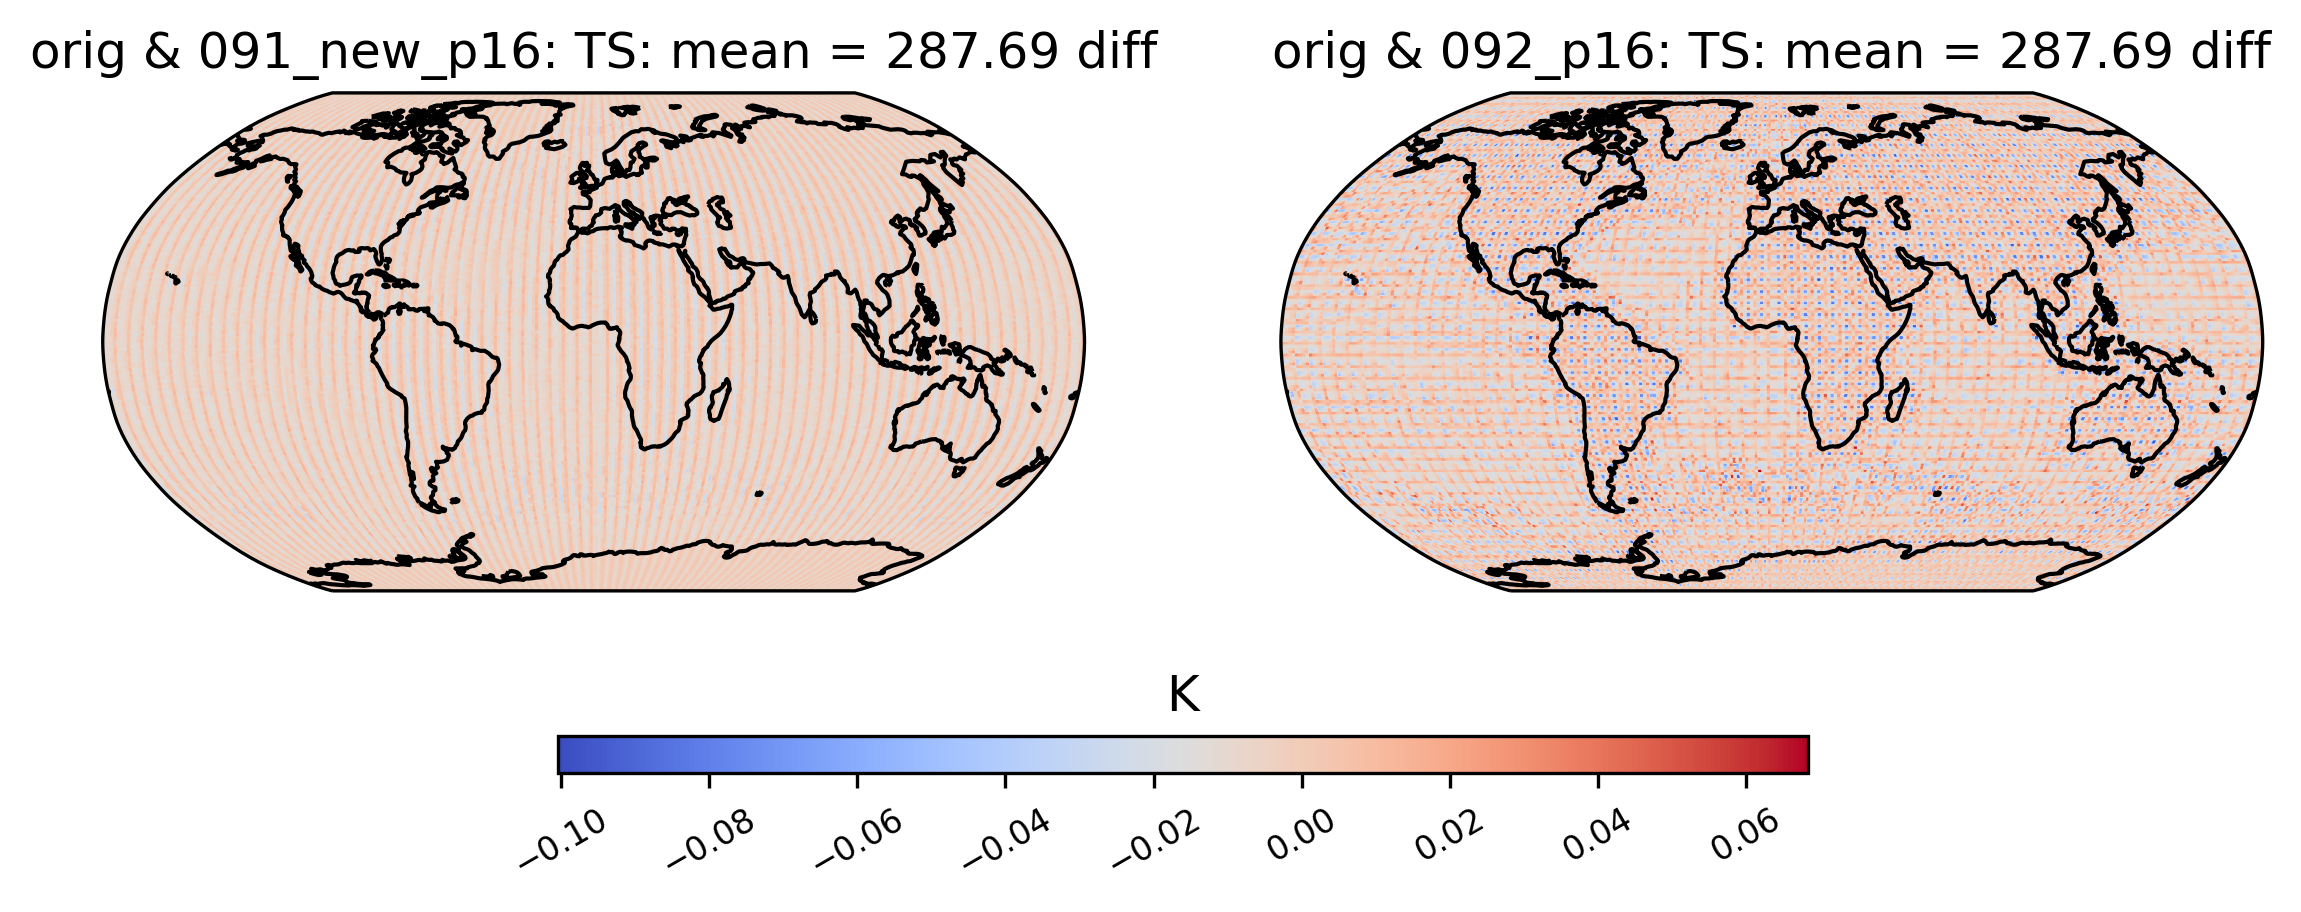

In [30]:
# diff between mean
ldcpy.plot(
    col_ts,
    "TS",
    sets=["orig", "091_new_p16", "092_p16"],
    calc="mean",
    calc_type="diff",
)

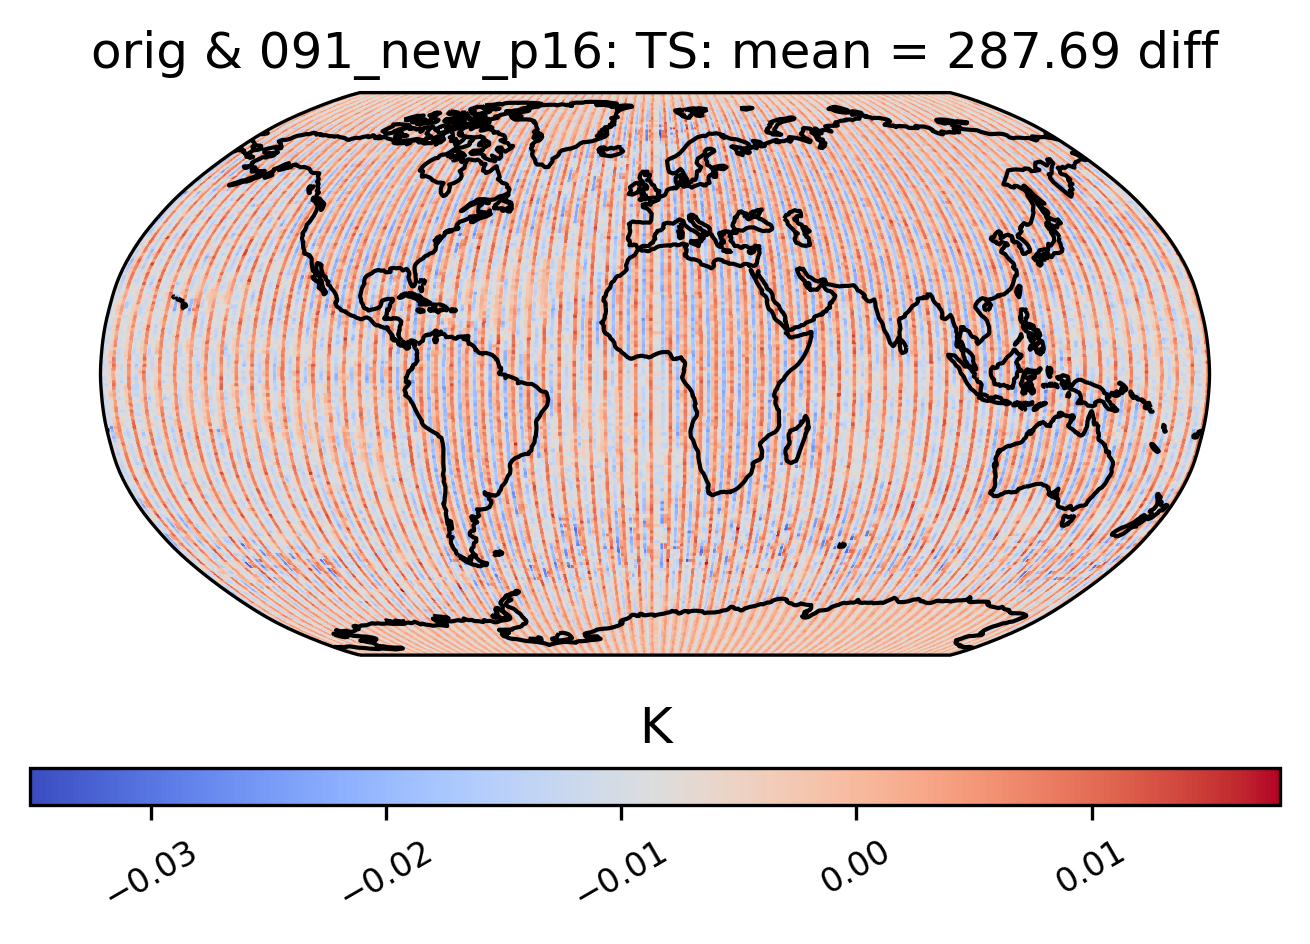

In [31]:
# diff between mean (just look at one)
ldcpy.plot(
    col_ts,
    "TS",
    sets=["orig", "091_new_p16"],
    calc="mean",
    calc_type="diff",
)

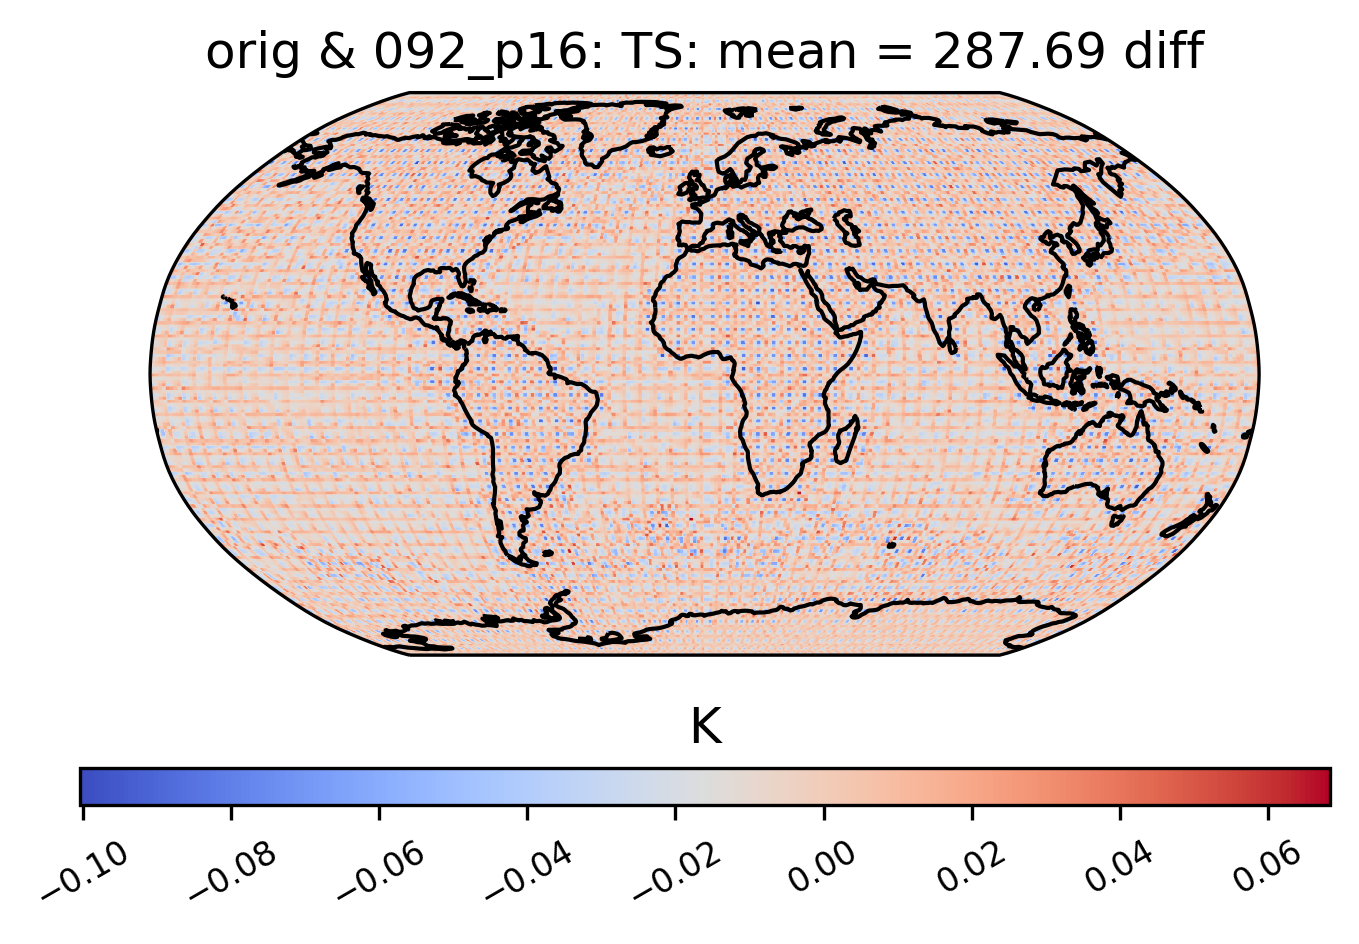

In [32]:
# diff between mean (just look at one)
ldcpy.plot(
    col_ts,
    "TS",
    sets=["orig", "092_p16"],
    calc="mean",
    calc_type="diff",
)

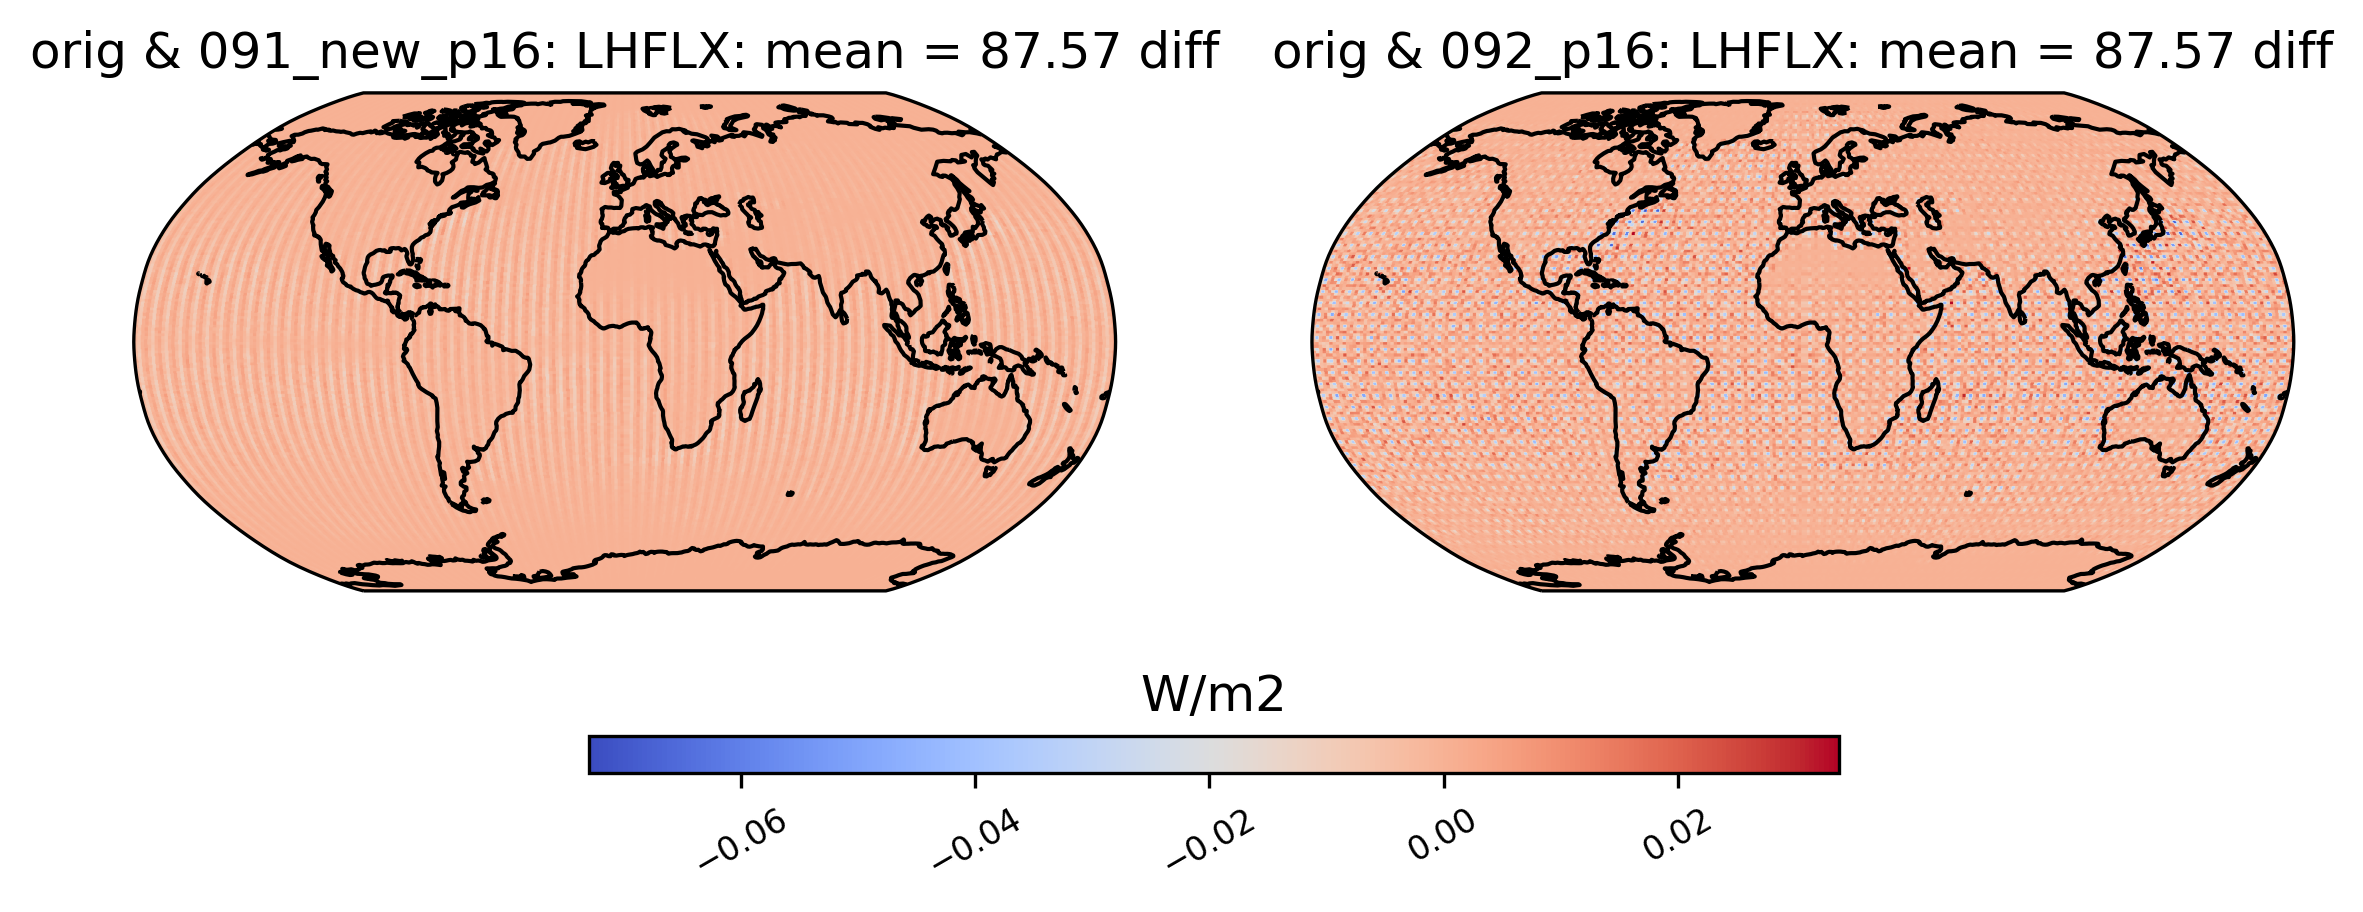

In [33]:
# diff between mean LHFLX values across the entire timeseries
ldcpy.plot(
    col_lhflx, "LHFLX", sets=["orig", "091_new_p16", "092_p16"], calc="mean", calc_type="diff"
)

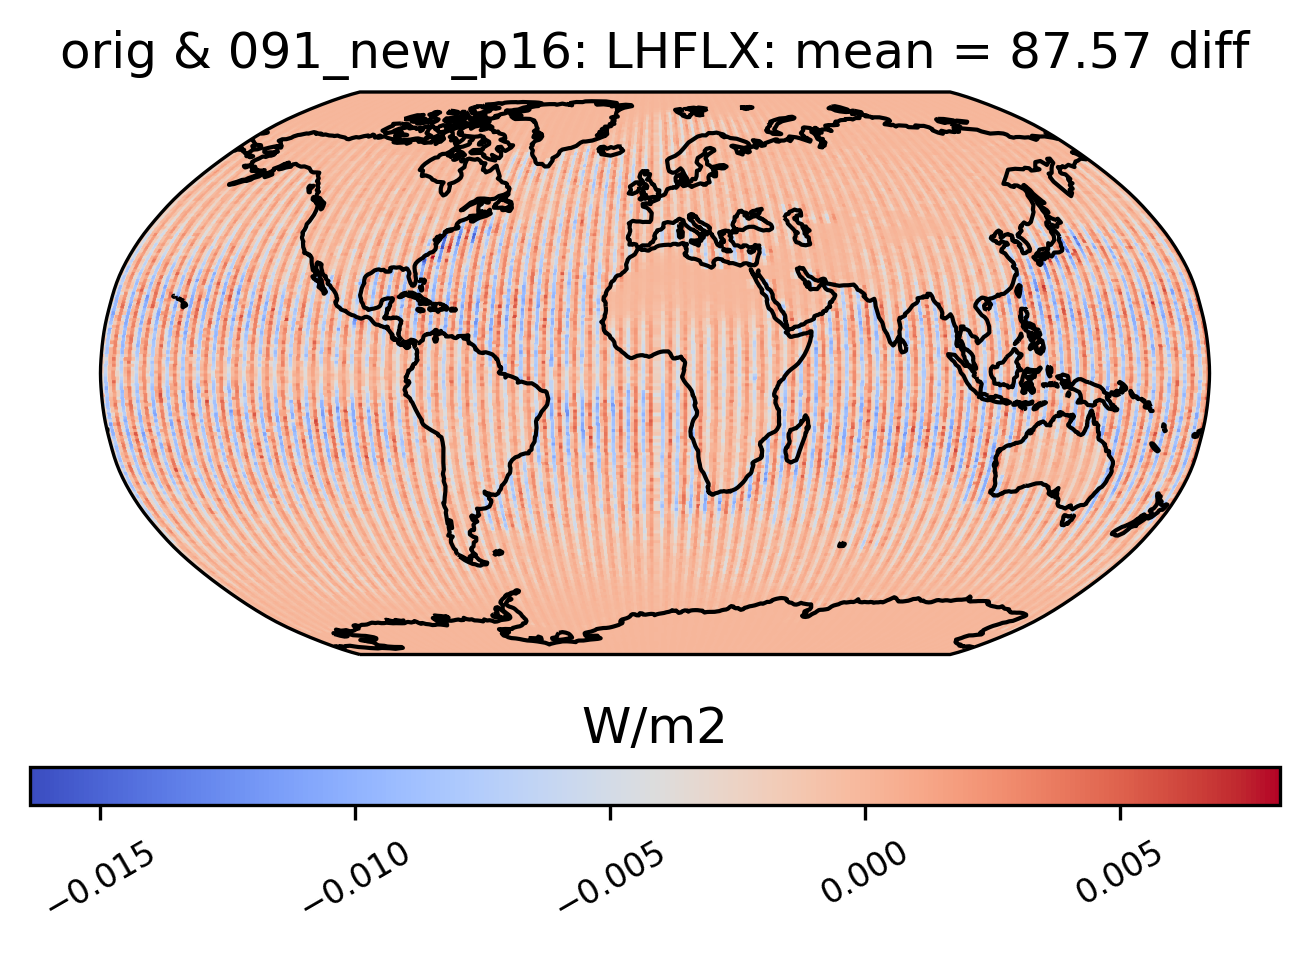

In [34]:
# diff between mean LHFLX values across the entire timeseries
# just one so we can zoom in more
ldcpy.plot(col_lhflx, "LHFLX", sets=["orig", "091_new_p16"], calc="mean", calc_type="diff")

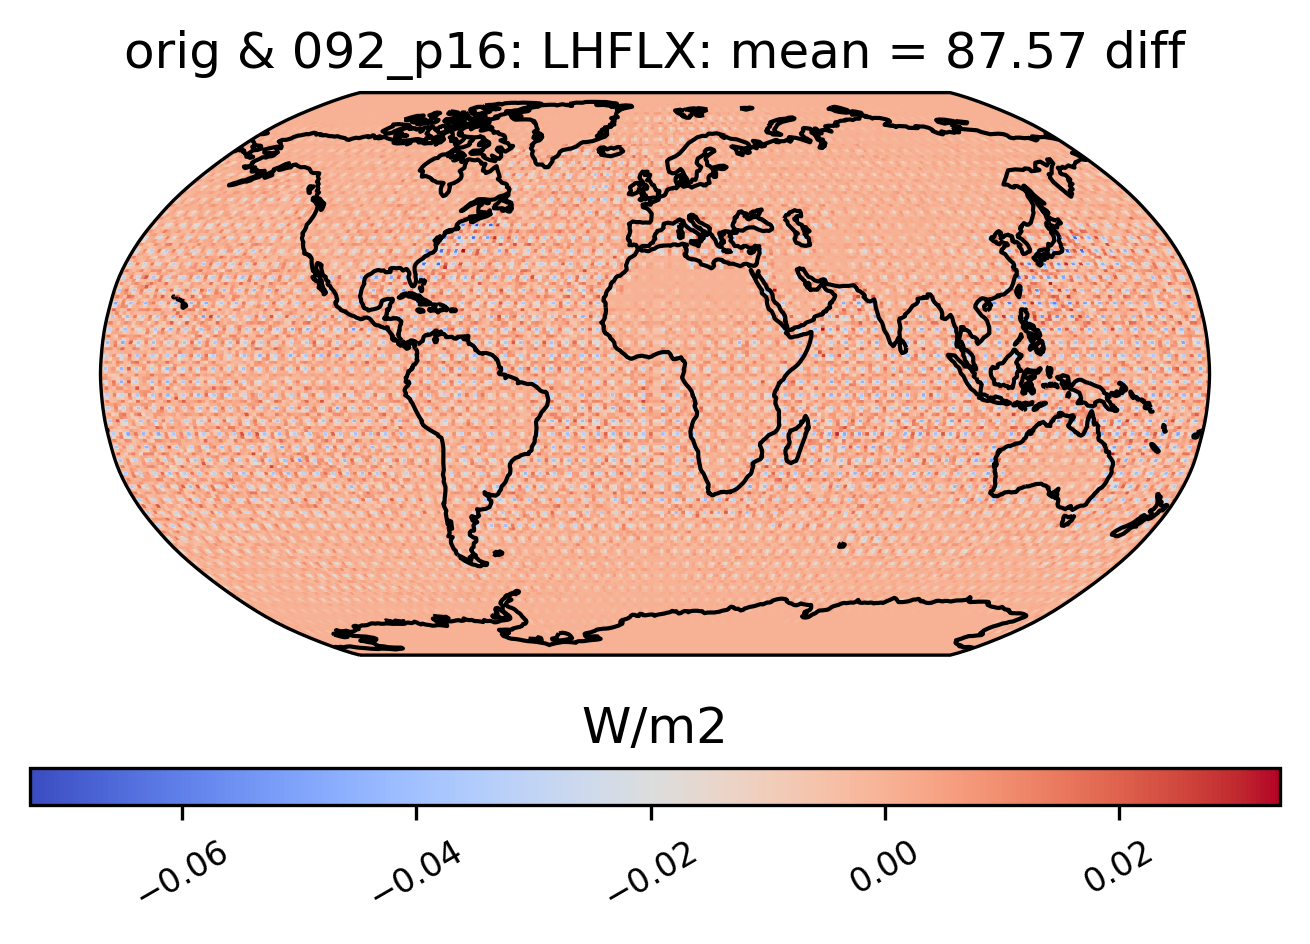

In [35]:
# just one so we can zoom in more
ldcpy.plot(col_lhflx, "LHFLX", sets=["orig", "092_p16"], calc="mean", calc_type="diff")

In [23]:
col_prect = ldcpy.open_datasets(
    "cam-fv",
    ["PRECT"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
    ],
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)
# col_prect

dataset size in GB 0.65



In [24]:
ldcpy.compare_stats(
    col_prect.isel(time=10),
    "PRECT",
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)

orig          091  091_new_p16  \
mean                           3.8033e-08   3.8033e-08   3.8034e-08   
variance                       4.3362e-15   4.3361e-15   4.3363e-15   
standard deviation             6.5849e-08   6.5849e-08   6.5851e-08   
min value                     -5.8031e-26  -1.0914e-11  -1.4552e-11   
max value                      1.6003e-06   1.6002e-06   1.6005e-06   
probability positive              0.99282      0.98752      0.98962   
number of zeros                       392          350          313   
spatial autocorr - latitude       0.89526      0.89526      0.89526   
spatial autocorr - longitude      0.92898      0.92898      0.92898   
entropy estimate                  0.53106      0.38731      0.38723   

                             092_chunk_t6_p16  
mean                               3.8034e-08  
variance                           4.3362e-15  
standard deviation                  6.585e-08  
min value                         -9.8225e-11  
max value                          1.6003e-06  
probability positive                  0.97121  
number of zeros                           397  
spatial autocorr - latitude           0.89526  
spatial autocorr - longitude          0.92898  
entropy estimate                      0.40196

091 091_new_p16 092_chunk_t6_p16
max abs diff                        1.4131e-10  2.1953e-10       4.4963e-10
min abs diff                                 0           0                0
mean abs diff                        2.213e-12   2.572e-12       1.1632e-11
mean squared diff                   1.7775e-27  6.6995e-25       9.0357e-26
root mean squared diff              5.7273e-12  6.7633e-12       2.6013e-11
normalized root mean squared diff   3.0771e-06  3.6264e-06        1.405e-05
normalized max pointwise error      8.8303e-05  0.00010045       0.00026815
pearson correlation coefficient              1           1                1
ks p-value                             0.25802     0.14216       1.1967e-11
spatial relative error(% > 0.0001)      26.248      31.069           79.644
max spatial relative error          2.7687e+11  6.0651e+19        2.021e+16
data SSIM                              0.99999     0.99999          0.99981
file size ratio                            1.5         1.5             1.34

In [ ]:
# Try other variables

In [9]:
col_flut = ldcpy.open_datasets(
    "cam-fv",
    ["FLUT"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.FLUT.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.FLUT.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.FLUT.20060101-20071231.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_taux = ldcpy.open_datasets(
    "cam-fv",
    ["TAUX"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.TAUX.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.TAUX.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.TAUX.20060101-20071231.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_z500 = ldcpy.open_datasets(
    "cam-fv",
    ["Z500"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.Z500.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.Z500.20060101-20071231.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.Z500.20060101-20071231.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

dataset size in GB 0.49

dataset size in GB 0.49

dataset size in GB 0.49



In [15]:
ldcpy.compare_stats(
    col_flut.isel(time=10),
    "FLUT",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                           233.65      233.66           233.65
variance                       1993.8      1993.8           1993.8
standard deviation             44.651      44.652           44.652
min value                      110.41      110.41           110.41
max value                      328.09      328.08           328.18
probability positive                1           1                1
number of zeros                     0           0                0
spatial autocorr - latitude   0.97643     0.97643          0.97643
spatial autocorr - longitude  0.98472     0.98472          0.98472
entropy estimate              0.46663     0.31509          0.35284

091_new_p16 092_chunk_t6_p16
max abs diff                          0.070618          0.22253
min abs diff                                 0                0
mean abs diff                         0.012271         0.032456
mean squared diff                   1.3612e-05       5.8746e-08
root mean squared diff                0.016048         0.042519
normalized root mean squared diff   6.6786e-05       0.00017566
normalized max pointwise error       0.0002581        0.0010223
pearson correlation coefficient              1                1
ks p-value                                   1                1
spatial relative error(% > 0.0001)      11.241           52.572
max spatial relative error          0.00026841       0.00096506
data SSIM                              0.99973          0.99943
file size ratio                           1.62             1.36

In [12]:
ldcpy.compare_stats(
    col_taux.isel(time=10),
    "TAUX",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                          -0.0063782  -0.0063769       -0.0063784
variance                        0.014342    0.014342         0.014342
standard deviation               0.11976     0.11976          0.11976
min value                        -1.0899     -1.0898          -1.0901
max value                        0.55382     0.55376          0.55389
probability positive             0.52261     0.52261          0.52264
number of zeros                        0           0                0
spatial autocorr - latitude      0.96316     0.96315          0.96316
spatial autocorr - longitude     0.98811     0.98811          0.98811
entropy estimate                 0.53153     0.38966          0.41652

091_new_p16 092_chunk_t6_p16
max abs diff                         0.0002028       0.00065827
min abs diff                                 0                0
mean abs diff                       4.1536e-06       1.5691e-05
mean squared diff                    1.622e-12       4.2014e-14
root mean squared diff              8.0617e-06       2.9504e-05
normalized root mean squared diff     4.99e-06       1.8409e-05
normalized max pointwise error      8.2098e-05       0.00040048
pearson correlation coefficient              1                1
ks p-value                                   1                1
spatial relative error(% > 0.0001)      22.493           73.362
max spatial relative error             0.85792           3.0032
data SSIM                              0.99996          0.99979
file size ratio                            1.5             1.31

In [11]:
ldcpy.compare_stats(
    col_z500.isel(time=10),
    "Z500",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                             5640.1      5640.2           5640.1
variance                      1.211e+05   1.211e+05        1.211e+05
standard deviation               347.99      347.99              348
min value                        4869.4      4869.4           4868.7
max value                        5902.9        5903           5902.1
probability positive                  1           1                1
number of zeros                       0           0                0
spatial autocorr - latitude     0.99892     0.99892          0.99892
spatial autocorr - longitude    0.99982     0.99982          0.99982
entropy estimate                 0.3914     0.20004          0.24375

091_new_p16 092_chunk_t6_p16
max abs diff                             1.124           3.2812
min abs diff                                 0                0
mean abs diff                          0.25598           0.5166
mean squared diff                    0.0068555        1.918e-05
root mean squared diff                 0.31772          0.66227
normalized root mean squared diff   0.00030056       0.00063057
normalized max pointwise error      0.00093922        0.0028521
pearson correlation coefficient              1                1
ks p-value                             0.32599          0.96573
spatial relative error(% > 0.0001)      7.8957           37.675
max spatial relative error          0.00018913       0.00053882
data SSIM                              0.98042          0.96171
file size ratio                           2.46             1.81

In [10]:
col_tmq = ldcpy.open_datasets(
    "cam-fv",
    ["TMQ"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TMQ.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TMQ.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TMQ.200601-201012.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_ps = ldcpy.open_datasets(
    "cam-fv",
    ["PS"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PS.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PS.200601-201012.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_cloud = ldcpy.open_datasets(
    "cam-fv",
    ["CLOUD"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
    ],
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)
col_qflx = ldcpy.open_datasets(
    "cam-fv",
    ["QFLX"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.QFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.QFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.QFLX.200601-201012.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_shflx = ldcpy.open_datasets(
    "cam-fv",
    ["SHFLX"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.SHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.SHFLX.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.SHFLX.200601-201012.nc",
    ],
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)
col_precc = ldcpy.open_datasets(
    "cam-fv",
    ["PRECC"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECC.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECC.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECC.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECC.200601-201012.nc",
    ],
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)
col_precl = ldcpy.open_datasets(
    "cam-fv",
    ["PRECL"],
    [
        "/glade/work/abaker/zfp-stuff/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECL.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECL.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/091_new/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECL.200601-201012.nc",
        "/glade/work/abaker/zfp-stuff/092_chunk_time_6/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECL.200601-201012.nc",
    ],
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)

dataset size in GB 0.04

dataset size in GB 0.04

dataset size in GB 1.59

dataset size in GB 0.04

dataset size in GB 0.04

dataset size in GB 0.05

dataset size in GB 0.05



In [18]:
ldcpy.compare_stats(
    col_tmq.isel(time=10),
    "TMQ",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                           23.627      23.628           23.627
variance                       234.53      234.54           234.53
standard deviation             15.315      15.315           15.314
min value                       0.269     0.26904          0.26898
max value                       57.75      57.755           57.747
probability positive                1           1                1
number of zeros                     0           0                0
spatial autocorr - latitude   0.99715     0.99715          0.99715
spatial autocorr - longitude  0.99814     0.99814          0.99814
entropy estimate              0.48328     0.33535          0.37013

091_new_p16 092_chunk_t6_p16
max abs diff                         0.0084419          0.02507
min abs diff                                 0                0
mean abs diff                        0.0011606        0.0030679
mean squared diff                    1.331e-07       8.2176e-11
root mean squared diff               0.0017131        0.0044664
normalized root mean squared diff   2.4584e-05        6.449e-05
normalized max pointwise error      0.00012709       0.00043615
pearson correlation coefficient              1                1
ks p-value                             0.43983          0.98359
spatial relative error(% > 0.0001)      10.297           54.915
max spatial relative error          0.00075643        0.0024611
data SSIM                              0.99975          0.99949
file size ratio                           1.59             1.36

In [19]:
ldcpy.compare_stats(
    col_ps.isel(time=10),
    "PS",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                               98520       98522            98520
variance                      9.2002e+07  9.2003e+07       9.2002e+07
standard deviation                9591.7      9591.8           9591.8
min value                          53028       53030            53024
max value                      1.027e+05   1.027e+05       1.0269e+05
probability positive                   1           1                1
number of zeros                        0           0                0
spatial autocorr - latitude       0.9861      0.9861           0.9861
spatial autocorr - longitude     0.99225     0.99225          0.99225
entropy estimate                 0.40566     0.20509          0.24583

091_new_p16 092_chunk_t6_p16
max abs diff                            18.438           48.648
min abs diff                                 0                0
mean abs diff                           3.8371           7.6011
mean squared diff                        1.782        0.0003963
root mean squared diff                  4.8227           9.8956
normalized root mean squared diff   9.6134e-05       0.00020078
normalized max pointwise error      0.00031266       0.00095102
pearson correlation coefficient              1                1
ks p-value                             0.38026          0.92152
spatial relative error(% > 0.0001)       5.145           30.225
max spatial relative error          0.00023497       0.00067901
data SSIM                              0.98032           0.9619
file size ratio                           2.26             1.79

In [20]:
ldcpy.compare_stats(
    col_qflx.isel(time=10),
    "QFLX",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig  091_new_p16 092_chunk_t6_p16
mean                           3.4658e-05   3.4658e-05       3.4658e-05
variance                       6.4199e-10   6.4201e-10       6.4199e-10
standard deviation             2.5338e-05   2.5338e-05       2.5337e-05
min value                     -1.4869e-06  -1.4845e-06      -1.4899e-06
max value                      0.00017879   0.00017879       0.00017879
probability positive              0.83239      0.83239          0.83245
number of zeros                         0            0                0
spatial autocorr - latitude       0.97843      0.97844          0.97843
spatial autocorr - longitude      0.98132      0.98132          0.98132
entropy estimate                  0.51154      0.36734          0.39682

091_new_p16 092_chunk_t6_p16
max abs diff                        2.5371e-08       7.8231e-08
min abs diff                                 0                0
mean abs diff                        1.805e-09       5.2359e-09
mean squared diff                   2.8402e-19       2.5371e-21
root mean squared diff              2.7539e-09       8.0018e-09
normalized root mean squared diff   1.2962e-05       3.7785e-05
normalized max pointwise error      9.3552e-05       0.00043394
pearson correlation coefficient              1                1
ks p-value                                   1                1
spatial relative error(% > 0.0001)      16.583           63.547
max spatial relative error            0.059081            5.616
data SSIM                              0.99991          0.99959
file size ratio                            1.5             1.32

In [27]:
ldcpy.compare_stats(
    col_cloud.isel(time=10),
    "CLOUD",
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)

orig          091  091_new_p16  \
mean                             0.11524      0.11524      0.11525   
variance                        0.025285     0.025285     0.025286   
standard deviation               0.15901      0.15901      0.15902   
min value                              0  -3.0518e-05  -3.0518e-05   
max value                        0.94072      0.94073      0.94072   
probability positive             0.69116       0.6938      0.69459   
number of zeros               5.1233e+05   5.0309e+05   5.0258e+05   
spatial autocorr - latitude      0.98293      0.98293      0.98293   
spatial autocorr - longitude     0.99211      0.99211      0.99211   
entropy estimate                 0.35131      0.25367      0.25373   

                             092_chunk_t6_p16  
mean                                  0.11524  
variance                             0.025285  
standard deviation                    0.15901  
min value                          -0.0006628  
max value                             0.94075  
probability positive                  0.71128  
number of zeros                    3.9721e+05  
spatial autocorr - latitude           0.98293  
spatial autocorr - longitude          0.99211  
entropy estimate                      0.30223

091 091_new_p16 092_chunk_t6_p16
max abs diff                        0.00011009  0.00014138        0.0010307
min abs diff                                 0           0                0
mean abs diff                       5.3515e-06  6.1895e-06       5.1348e-05
mean squared diff                   9.7664e-17  3.5016e-12       1.1983e-14
root mean squared diff              1.0364e-05  1.2059e-05       9.0496e-05
normalized root mean squared diff   1.2258e-05  1.4271e-05       0.00010218
normalized max pointwise error      0.00011405  0.00012241        0.0010956
pearson correlation coefficient              1           1                1
ks p-value                          1.3546e-06  6.7596e-09                0
spatial relative error(% > 0.0001)      8.8154      12.176           59.012
max spatial relative error              1215.7       513.9       1.1861e+06
data SSIM                              0.99996     0.99995          0.54418
file size ratio                            1.5         1.5             1.14

In [11]:
ldcpy.compare_stats(
    col_precc.isel(time=10),
    "PRECC",
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)

orig         091 091_new_p16  \
mean                          2.2518e-08  2.2518e-08  2.2518e-08   
variance                      8.0553e-16  8.0553e-16  8.0556e-16   
standard deviation            2.8382e-08  2.8382e-08  2.8382e-08   
min value                              0  -7.276e-12  -7.276e-12   
max value                     2.7011e-07   2.701e-07  2.7007e-07   
probability positive             0.73872      0.7447      0.7464   
number of zeros                    14448       13725       13683   
spatial autocorr - latitude      0.96885     0.96885     0.96885   
spatial autocorr - longitude      0.9823      0.9823      0.9823   
entropy estimate                 0.39394       0.291      0.2911   

                             092_chunk_t6_p16  
mean                               2.2518e-08  
variance                           8.0553e-16  
standard deviation                 2.8382e-08  
min value                         -3.3197e-11  
max value                          2.7012e-07  
probability positive                  0.75736  
number of zeros                         12228  
spatial autocorr - latitude           0.96885  
spatial autocorr - longitude           0.9823  
entropy estimate                      0.31789

091 091_new_p16 092_chunk_t6_p16
max abs diff                        3.5882e-11  4.2085e-11         1.13e-10
min abs diff                                 0           0                0
mean abs diff                        1.102e-12  1.2819e-12       4.7533e-12
mean squared diff                   9.1195e-29  1.6117e-25       2.4157e-27
root mean squared diff              2.3564e-12  2.7768e-12       9.5526e-12
normalized root mean squared diff   7.0854e-06  8.3459e-06       2.8733e-05
normalized max pointwise error      0.00010754  0.00015581       0.00041835
pearson correlation coefficient              1           1                1
ks p-value                             0.12359    0.039177       1.5502e-11
spatial relative error(% > 0.0001)      12.272      16.036            52.93
max spatial relative error          2.9687e+17  1.9791e+17       2.5333e+19
data SSIM                               0.9999     0.99991          0.99973
file size ratio                           1.48        1.48             1.24

In [26]:
ldcpy.compare_stats(
    col_precl.isel(time=10),
    "PRECL",
    ["orig", "091", "091_new_p16", "092_chunk_t6_p16"],
)

orig         091  091_new_p16  \
mean                          1.2371e-08  1.2371e-08   1.2371e-08   
variance                      2.1496e-16  2.1496e-16   2.1497e-16   
standard deviation            1.4662e-08  1.4662e-08   1.4662e-08   
min value                     3.6301e-17  3.6158e-17  -8.8818e-16   
max value                     2.0999e-07  2.0998e-07      2.1e-07   
probability positive                   1           1      0.99998   
number of zeros                        0           0            0   
spatial autocorr - latitude      0.94254     0.94254      0.94254   
spatial autocorr - longitude     0.95631     0.95631      0.95631   
entropy estimate                 0.51254     0.37078      0.37046   

                             092_chunk_t6_p16  
mean                               1.2371e-08  
variance                           2.1496e-16  
standard deviation                 1.4661e-08  
min value                          -1.728e-11  
max value                          2.1002e-07  
probability positive                  0.99928  
number of zeros                             0  
spatial autocorr - latitude           0.94254  
spatial autocorr - longitude          0.95631  
entropy estimate                      0.39828

091 091_new_p16 092_chunk_t6_p16
max abs diff                        1.9917e-11  2.1139e-11       1.0044e-10
min abs diff                                 0           0                0
mean abs diff                       6.2432e-13  7.2165e-13       3.0154e-12
mean squared diff                   4.0636e-29  4.5658e-26       1.1193e-27
root mean squared diff              1.2164e-12  1.4126e-12       5.4318e-12
normalized root mean squared diff   5.6374e-06  6.5501e-06       2.4367e-05
normalized max pointwise error      9.4846e-05  0.00010067       0.00034257
pearson correlation coefficient              1           1                1
ks p-value                             0.48535     0.48535          0.98861
spatial relative error(% > 0.0001)      14.317      19.548           71.428
max spatial relative error             0.44804       2.333       1.3041e+05
data SSIM                              0.99997     0.99996          0.99858
file size ratio                            1.5         1.5             1.32

In [11]:
ldcpy.compare_stats(
    col_shflx.isel(time=10),
    "SHFLX",
    ["orig", "091_new_p16", "092_chunk_t6_p16"],
)

orig 091_new_p16 092_chunk_t6_p16
mean                           16.569      16.569           16.569
variance                       563.95      563.97           563.95
standard deviation             23.748      23.748           23.748
min value                     -41.554     -41.558          -41.546
max value                      202.97      202.97           202.95
probability positive          0.70779     0.70779          0.70779
number of zeros                     0           0                0
spatial autocorr - latitude   0.91108     0.91108          0.91108
spatial autocorr - longitude  0.93676     0.93676          0.93676
entropy estimate              0.51513      0.3724          0.40266

091_new_p16 092_chunk_t6_p16
max abs diff                            0.0298         0.093651
min abs diff                                 0                0
mean abs diff                        0.0011135        0.0037087
mean squared diff                   1.1805e-07       5.1252e-10
root mean squared diff                0.002103        0.0068452
normalized root mean squared diff   8.2184e-06       2.7103e-05
normalized max pointwise error      9.7408e-05       0.00034449
pearson correlation coefficient              1                1
ks p-value                                   1                1
spatial relative error(% > 0.0001)      17.497           64.012
max spatial relative error             0.21136           2.7049
data SSIM                               0.9998          0.99979
file size ratio                            1.5             1.31

In [12]:
col_precc

<xarray.Dataset>
Dimensions:     (collection: 4, time: 60, lat: 192, lon: 288)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time        (time) object 2006-02-01 00:00:00 ... 2011-01-01 00:00:00
    cell_area   (lat, collection, lon) float64 dask.array<chunksize=(192, 1, 288), meta=np.ndarray>
  * collection  (collection) <U16 'orig' '091' '091_new_p16' '092_chunk_t6_p16'
Data variables:
    PRECC       (collection, time, lat, lon) float32 dask.array<chunksize=(1, 60, 192, 288), meta=np.ndarray>
Attributes: (12/15)
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CNBDRD.f09_g16.031
    title:            UNSET
    logname:          mickelso
    host:             ys1023
    ...               ...
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Thu May 20 11:08:35 2021: ncks -d time,0,59,1 b.e11.BRC...
    NCO:              netCDF Operators version 4.9.5 (Homepage = http://nco.s...
    cell_measures:    area: cell_area
    data_type:        cam-fv
    file_size:        {'orig': 8341117, '091': 5620148, '091_new_p16': 562640...

In [13]:
a091 = col_precc["PRECC"].isel(time=10).sel(collection="091").data.compute()
a091_new = col_precc["PRECC"].isel(time=10).sel(collection="091_new_p16").data.compute()
aorig = col_precc["PRECC"].isel(time=10).sel(collection="orig").data.compute()

In [37]:
dd = a091 - a091_new
print(dd.min())
dd = aorig - a091_new
print(dd.min())
dd = aorig - a091
print(dd.min())

-4.0017767e-11
-3.5882408e-11
-3.5882408e-11


In [27]:
import numpy as np
from scipy import stats as ss

aorig_p = (np.ravel(aorig)).astype('float64')
a091_new_p = (np.ravel(a091_new)).astype('float64')
a091_p = (np.ravel(a091)).astype('float64')
ks = np.asanyarray(ss.ks_2samp(a091_p, aorig_p))
print(ks[1])
ks_new = np.asanyarray(ss.ks_2samp(a091_new_p, aorig_p))
print(ks_new[1])

0.12359329971835609
0.03917702624650243


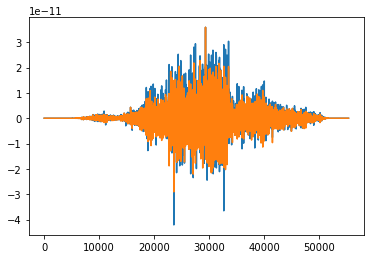

In [46]:
from matplotlib import pyplot as plt

plt.plot(a091_new_p - aorig_p)
plt.plot(a091_p - aorig_p)

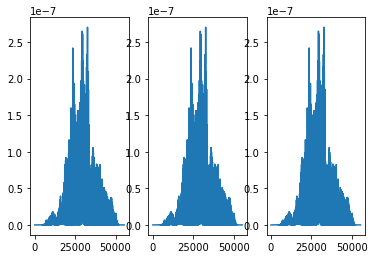

In [52]:
ax1 = plt.subplot(131)
plt.plot(aorig_p)
ax2 = plt.subplot(132)
plt.plot(a091_new_p)
ax3 = plt.subplot(133)
plt.plot(a091_p)

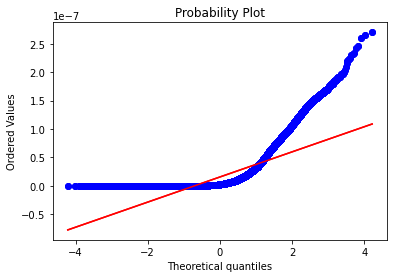

In [47]:
ss.probplot(a091_p, plot=plt)
plt.show()

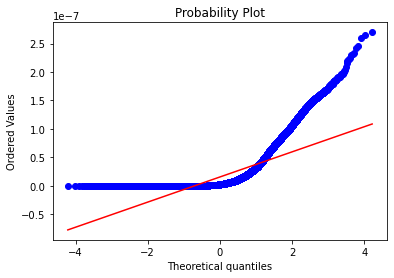

In [45]:
ss.probplot(a091_new_p, plot=plt)
plt.show()

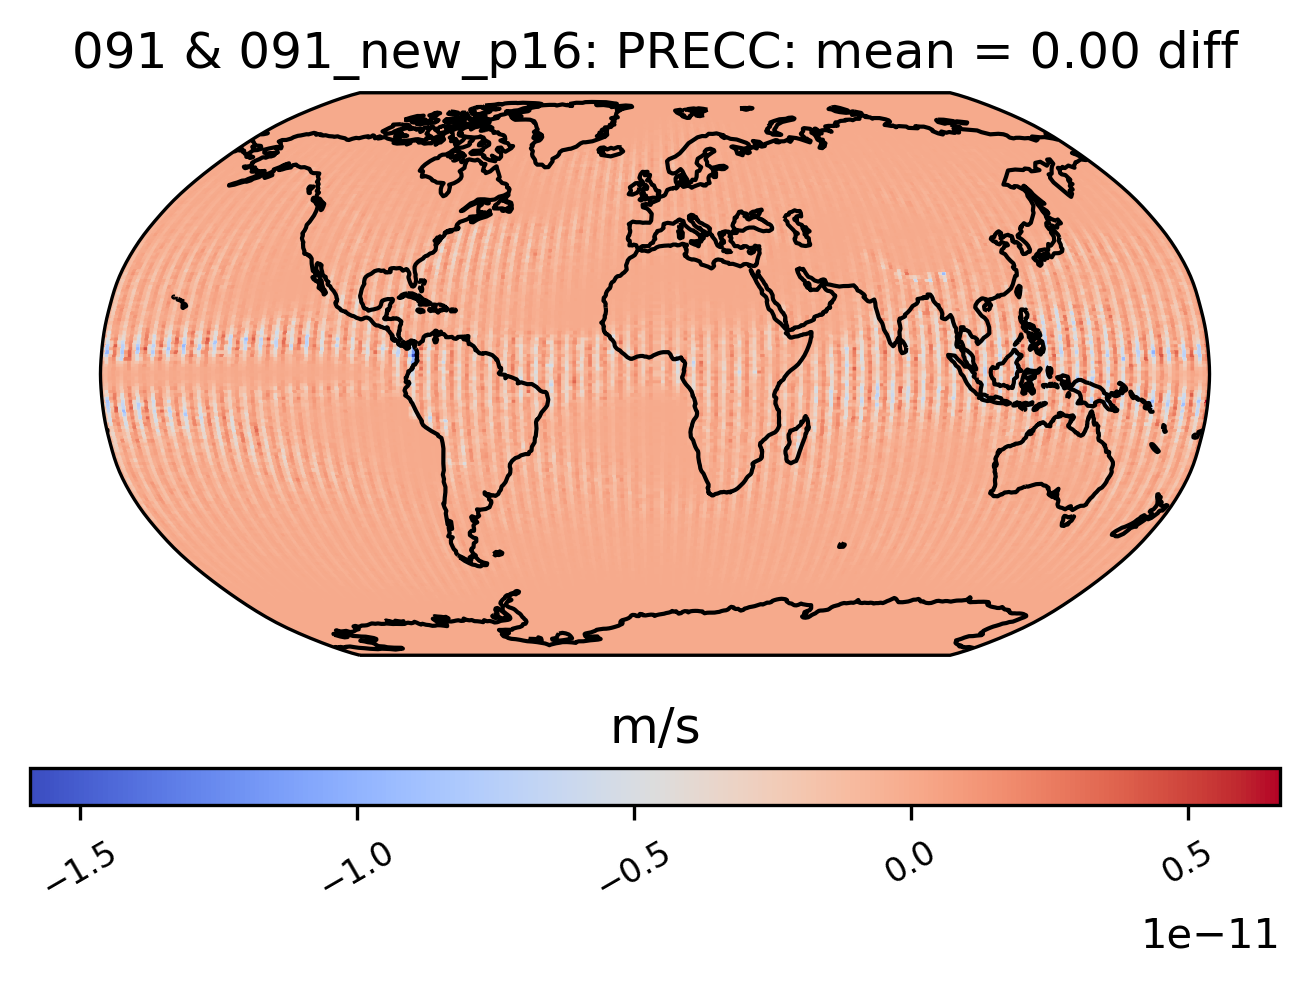

In [40]:
ldcpy.plot(col_precc, "PRECC", sets=["091", "091_new_p16"], calc="mean", calc_type="diff")

In [25]:
# Disconnect when finished
cluster.close()
client.close()